In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

from navground import core, sim

In [14]:
length = 8.0
num_steps = 400
width=1.0
num_agents = 31 # 38
num_runs = 10
behaviour_list = ["ORCA", "HL", "HRVO", "Dummy"]
color_behaviour = {}
runs={}
for i, behaviour in enumerate(behaviour_list):
    color_behaviour[behaviour] = mpl.colormaps["Set1"](i / (len(behaviour_list) +1))
for behaviour in behaviour_list:
    path=f"experiment_basic_{behaviour}.h5"
    yaml = f"""
    steps: {num_steps}
    time_step: 0.1
    record_pose: true
    record_twist: true
    terminated_when_idle_or_stuck: false
    runs: {num_runs}
    scenario:
      type: Corridor
      length: {length}
      width: {width} 
      agent_margin: 0.1
      target_margin: 0.5
      tolerance: 0.25
      groups:
        -
          type: thymio
          number: {num_agents}
          radius: 0.08
          control_period: 0.1
          speed_tolerance: 0.02
          kinematics:
            type: 2WDiff
            wheel_axis: 0.094
            max_speed: 0.166
          behavior:
            type: {behaviour}
            optimal_speed: 0.12
            horizon: 5.0
            safety_margin:
              sampler: uniform
              from: 0.0
              to: 0.2
              once: true
          state_estimation:
            type: Bounded
            range: 5.0
    """
    experiment = sim.load_experiment(yaml)
    experiment.run(number_of_threads=12)
    runs[behaviour] = experiment.runs

Agent does not have a geometric environmental state despite that it is using a geometric state estimation
Agent does not have a geometric environmental state despite that it is using a geometric state estimation
Agent does not have a geometric environmental state despite that it is using a geometric state estimation
Agent does not have a geometric environmental state despite that it is using a geometric state estimation
Agent does not have a geometric environmental state despite that it is using a geometric state estimation
Agent does not have a geometric environmental state despite that it is using a geometric state estimation
Agent does not have a geometric environmental state despite that it is using a geometric state estimation
Agent does not have a geometric environmental state despite that it is using a geometric state estimation
Agent does not have a geometric environmental state despite that it is using a geometric state estimation
Agent does not have a geometric environmental 

In [15]:
import math
def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

distancesMove={key: {i: {} for i in range(10)} for key in behaviour_list}

In [16]:
for n,behaviour in enumerate(behaviour_list):
    for i in range(10):
        ps = runs[behaviour][i].poses
        totalMoveDistance=[]
        for j in range(num_steps-1):
            time1=j
            time2=j+1
            distances=[]
            for z in range(num_agents):
                x1=ps[time1,i,0]
                y1=ps[time1,i,1]
                x2=ps[time2,i,0]
                y2=ps[time2,i,1]
                distance=calculate_distance(x1,y1,x2,y2)
                distances.append(distance)
            totalMoveDistance.append(sum(distances))
        distancesMove[behaviour][i] = totalMoveDistance

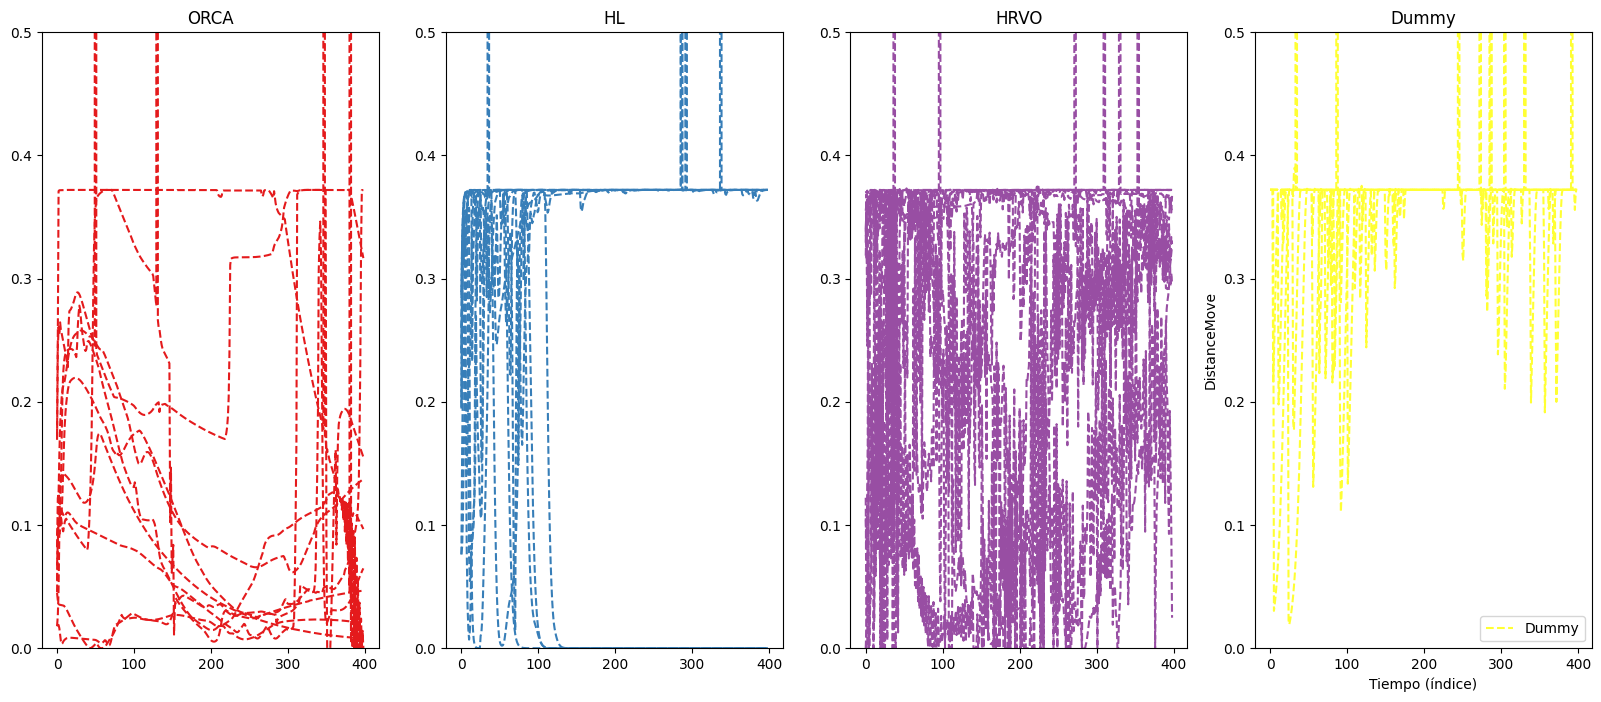

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))
axes = axes.flatten()
for n,behaviour in enumerate(behaviour_list):
    for i in range(10):
        serie = distancesMove[behaviour][i]
    
    
        # Graficar la serie temporal
        plt.sca(axes[n])
        plt.plot(np.array(serie),  linestyle='--', color=color_behaviour[behaviour],label=behaviour)
        plt.ylim((0,0.5))
        plt.title(f"{behaviour}")
# group labels, to have in the legend 1 per behavior
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel("Tiempo (índice)")
plt.ylabel("DistanceMove")
plt.show()